In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import os
os.chdir("/Users/pratham/Downloads")

In [4]:
#Load the dataset
df = pd.read_csv("messidor_features.csv")

In [5]:
del df['id']

<h2 id="Attribute-Information:" class="small-heading"><span style="text-decoration: underline;"><strong>Attribute Information:</strong></span></h2>
<p>&nbsp;</p>
<blockquote>
<p><span class="normal" style="color: #ff0000;">0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.&nbsp;<br />1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.&nbsp;<br />2-7) The results of MA detection. Each feature value stand for the&nbsp;<br />number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.&nbsp;<br />8-15) contain the same information as 2-7) for exudates. However,&nbsp;<br />as exudates are represented by a set of points rather than the number of&nbsp;<br />pixels constructing the lesions, these features are normalized by dividing the&nbsp;<br />number of lesions with the diameter of the ROI to compensate different image&nbsp;<br />sizes.&nbsp;<br />16) The euclidean distance of the center of&nbsp;<br />the macula and the center of the optic disc to provide important information&nbsp;<br />regarding the patient&acirc;&euro;&trade;s condition. This feature&nbsp;<br />is also normalized with the diameter of the ROI.&nbsp;<br />17) The diameter of the optic disc.&nbsp;<br />18) The binary result of the AM/FM-based classification.&nbsp;<br />19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.</span></p>
</blockquote>

In [6]:
df.head(n=6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [8]:
np.shape(df)

(1151, 20)

In [9]:
#Missing Values Check
df.isnull().sum().sum()

0L

<h3><strong>So, there are no missing values in the dataset</strong></h3>

In [66]:
#Image Quality Assessment - 0 = bad quality 1 = sufficient quality
df['0'].value_counts()

1    1147
0       4
Name: 0, dtype: int64

<h3><strong>If we evaluate the quality assessment of every patient then almost all patient's have sufficient quality for a reliable decision. 4 bad quality can be the exception cases but to keep the homogeneity of the dataset, we will assume all the features extracted from image processing algorithms were of sufficient quality.</strong></h3>

In [10]:
#Pre-Screening - Severe Retinal Abnormality -1 Lacking Retinal Abnormality - 0
df['1'].value_counts()

1    1057
0      94
Name: 1, dtype: int64

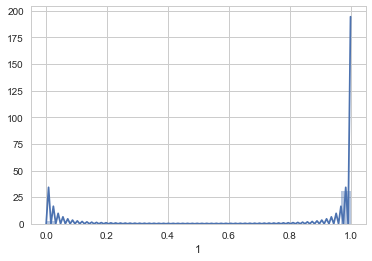

In [27]:
sns.distplot(df['1']);
plt.show()

<p><strong>92% of the patients are facing severe abnormality.</strong></p>

<div class="page" title="Page 7">
<div class="layoutArea">
<div class="column">
<h2><span style="text-decoration: underline;"><strong>Microaneurysm Detection</strong></span></h2>
<div class="page" title="Page 7">
<div class="layoutArea">
<div class="column">
<p>They appear as small red dots in the image and their resemblance to vessel fragments make it hard to detect them efficiently.</p>
</div>
</div>
</div>
<p>&nbsp;</p>
</div>
</div>
</div>
<p><img src="https://i.imgur.com/P7lJ6C6.png" alt="MA- Detection" width="460" height="400" /></p>

In [52]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

tf = pd.DataFrame({'0.5': df["2"],
                   '0.6': df["3"],
                   '0.7': df["4"]})
fig = ff.create_distplot([tf[c] for c in tf.columns],
                         tf.columns, bin_size=.25,
                         colors = ['rgb(0, 0, 100)', '#F64E8B','#2BCDC1'],)
fig['layout'].update(title='Microaneurysm detection at different confidence levels')

py.iplot(fig)

In [48]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

tf = pd.DataFrame({'0.8': df["5"],
                   '0.9': df["6"],
                   '1.0': df["7"]})
fig = ff.create_distplot([tf[c] for c in tf.columns],
                         tf.columns, bin_size=.25,
                         )
fig['layout'].update(title='Microaneurysm detection at different confidence levels')

py.iplot(fig)

<h2><strong>INSIGHTS : -</strong></h2>
<ul>
<li>
<h3><strong>Less number of microaneurysms are detected as the confidence level increases.</strong></h3>
</li>
<li>
<h3><strong>As the confidence level gradually decreases we can observe a higher number of microaneurysms are detected.&nbsp;</strong></h3>
</li>
</ul>
<p>&nbsp;</p>

<h2><span style="text-decoration: underline;"><strong>Exudate Detection</strong></span></h2>
<div class="page" title="Page 7">
<div class="layoutArea">
<div class="column">
<p>Exudates are primary signs of diabetic retinopathy and occur when lipid or fat leak from blood vessels or aneurysms. Exudates are bright, small spots, which can have an irregular shape.</p>
</div>
</div>
</div>
<p><img src="https://i.imgur.com/1xsgaPT.png" alt="" /></p>

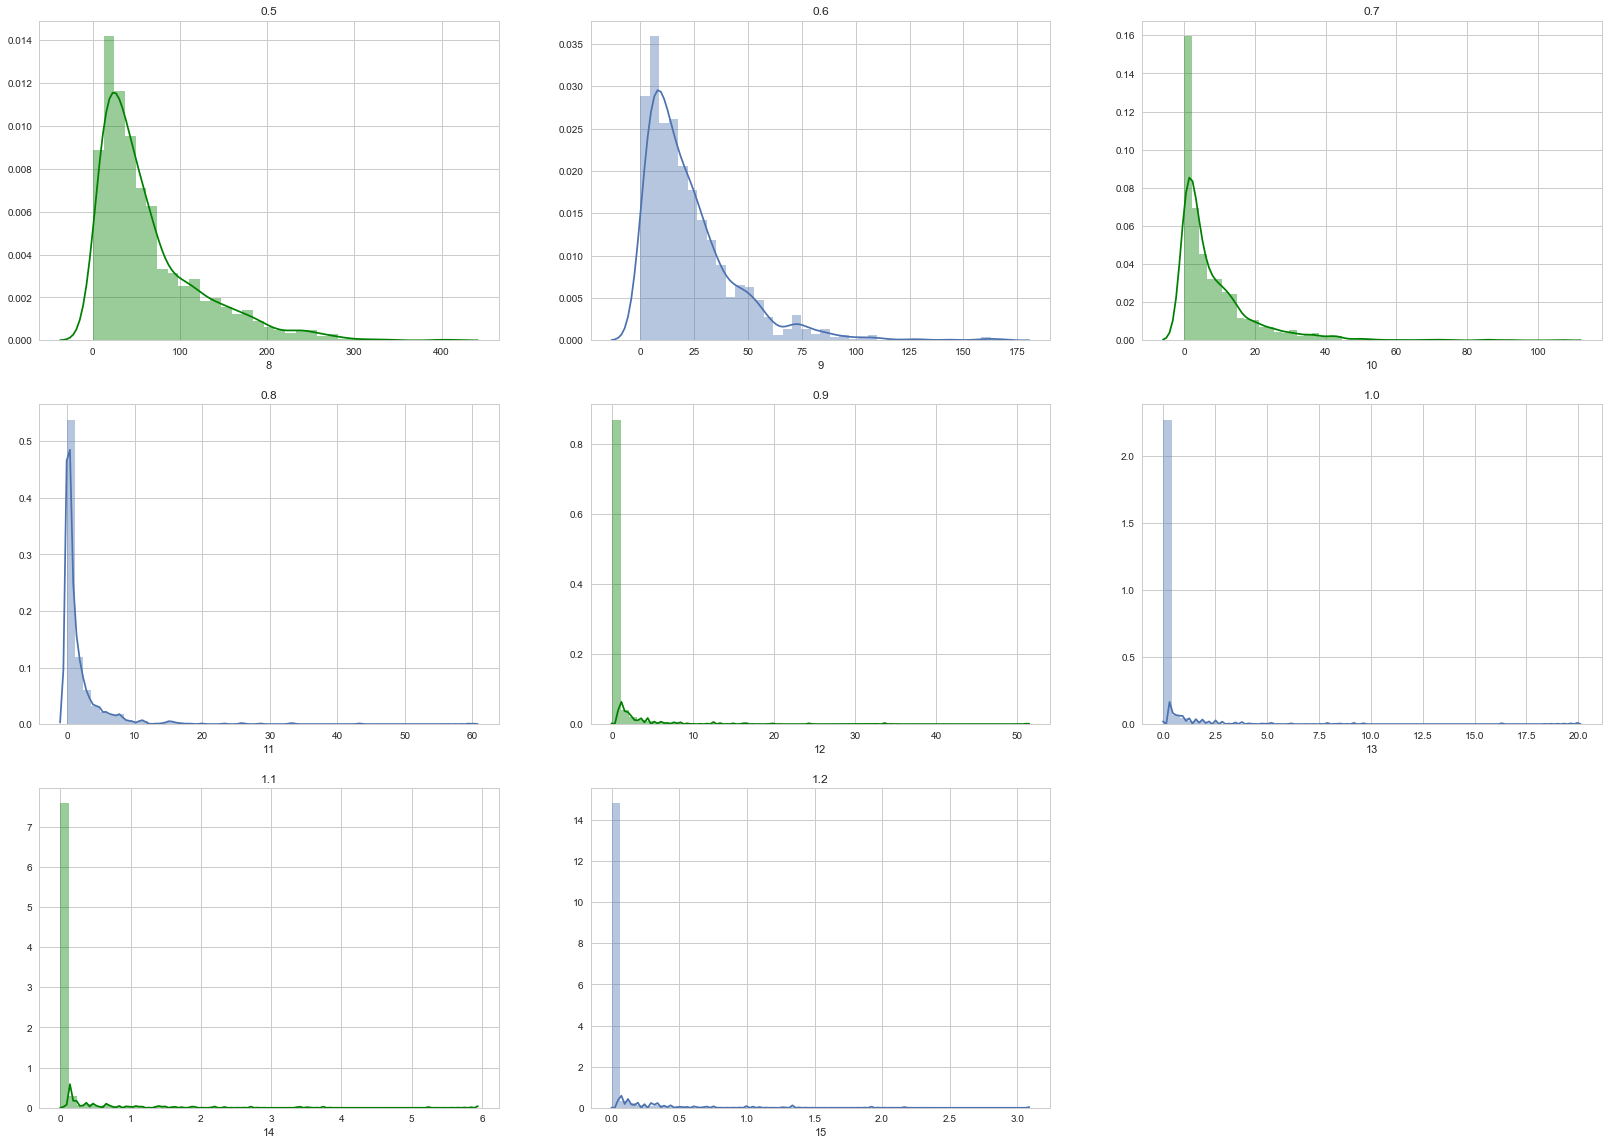

In [76]:
plt.figure(1, figsize=(28, 20),)
hfont = {'fontname':'DejaVu Sans'}

plt.subplot(331)
sns.distplot(df["8"],color = 'green');
plt.title("0.5")
plt.grid(True)

plt.subplot(332)
sns.distplot(df["9"]);
plt.title("0.6")
plt.grid(True)

plt.subplot(333)
sns.distplot(df["10"],color = 'green');
plt.title("0.7")
plt.grid(True)

plt.subplot(334)
sns.distplot(df["11"]);
plt.title("0.8")
plt.grid(True)

plt.subplot(335)
sns.distplot(df["12"],color = 'green');
plt.title("0.9")
plt.grid(True)

plt.subplot(336)
sns.distplot(df["13"]);
plt.title("1.0")
plt.grid(True)

plt.subplot(337)
sns.distplot(df["14"],color = 'green');
plt.title("1.1")
plt.grid(True)

plt.subplot(338)
sns.distplot(df["15"]);
plt.title("1.2")
plt.grid(True)

plt.show()

<h2><strong>INSIGHTS : -</strong></h2>
<ul>
<li>
<h3><strong><strong>As the confidence level increases, the number of exudates detected decreases gradually.&nbsp;</strong></strong></h3>
</li>
</ul>
<p>&nbsp;</p>

<h2>Model Building<h2>

In [209]:
data = df.drop(['Class'], axis=1)

In [210]:
target = df["Class"]

In [211]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(data, df["Class"], test_size=0.30, random_state=42)

In [309]:
#Decision Tree -1
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
predicted_dt = model.predict(X_test)

In [310]:
accuracy_score(y_test, predicted_dt)

0.60115606936416188

In [214]:
#KNN - 2
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
predicted_KNN = model.predict(X_test)

In [215]:
accuracy_score(y_test, predicted_KNN)

0.62138728323699421

In [306]:
#Random Forest - 3
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)
#predicted_RF = model.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [307]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [308]:
accuracy_score(y_test, predicted_RF)

0.65606936416184969

In [207]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.108907)
2. feature 8 (0.099999)
3. feature 17 (0.073899)
4. feature 11 (0.069191)
5. feature 16 (0.066918)
6. feature 9 (0.065496)
7. feature 6 (0.063824)
8. feature 10 (0.057242)
9. feature 3 (0.053743)
10. feature 7 (0.049904)
11. feature 13 (0.048813)
12. feature 5 (0.047564)
13. feature 15 (0.047459)
14. feature 12 (0.046539)
15. feature 4 (0.045771)
16. feature 14 (0.035114)
17. feature 18 (0.010818)
18. feature 1 (0.007957)
19. feature 0 (0.000840)


In [304]:
#Gradient Boosting Machine - 4
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted_GBM = model.predict(X_test)

In [305]:
accuracy_score(y_test, predicted_RF)

0.65606936416184969

In [311]:
#Naive Bayes - 5
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predicted_NB = model.predict(X_test)

In [312]:
accuracy_score(y_test, predicted_NB)

0.55780346820809246

In [299]:
#Adaboost - 6
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

In [300]:
model.fit(X_train, y_train)
predicted_ADB = model.predict(X_test)

In [301]:
accuracy_score(y_test, predicted_ADB)

0.70231213872832365

In [297]:
#Support Vector Machines - 7
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)
predicted_SVM = model.predict(X_test)

In [298]:
accuracy_score(y_test, predicted_SVM)

0.67630057803468213

In [226]:
df.describe()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.530843
std,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.499265
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000
50%,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,1.000000
75%,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000
max,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000


In [208]:
del df["0"],df["1"],df["18"]

In [294]:
#Ensemble Learning
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [295]:
# create the sub models -RF + GBC + ADB
estimators = []
model1 = RandomForestClassifier()
estimators.append(('Random Forest', model1))
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=1, random_state=0)
estimators.append(('GBC', model2))
model3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
estimators.append(('ADB', model3))

In [296]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.657067901235


In [287]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 

scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [316]:
#Multilayer Perceptron
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

model.fit(X_train, y_train)
predicted_MLP = model.predict(X_test)

In [317]:
accuracy_score(y_test, predicted_MLP)

0.76300578034682076

In [290]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_MLP)
print('Confusion Matrix : \n', cm)


('Confusion Matrix : \n', array([[129,  26],
       [ 56, 135]]))


In [291]:
TN = np.float(cm[0][0])
FN = np.float(cm[1][0])
TP = np.float(cm[1][1])
FP = np.float(cm[0][1])

In [292]:
#Sensitivity and Specifivity
sensitivity  = TP / (TP+FN)
specificity  = TN / (TN+FP)

In [293]:
print(sensitivity)
print(specificity)

0.706806282723
0.832258064516


<p><strong>We have chosen the model whose performance in terms of sensitivity and specificity is highest.</strong></p>

<p>&nbsp;</p>
<p>A highly sensitive test means that there are few false negative results, and thus fewer cases of the disease are missed.</p>
<p>A highly specific test means that there are few false positive results. It may not be feasible to use a test with low specificity for screening, since many people without the disease will screen positive, and potentially receive unnecessary diagnostic procedures.</p>